In [1]:
from xenonnt_plot_style import XENONPlotStyle as xps

xps.use("xenonnt")

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from fitdis.dune.oscillation import E_vs
from fitdis.dune.oscillation import MASS, BASELINE, ARGON_MOL_MASS, AVOGADRO, POT_PER_YEAR
from fitdis.dune.oscillation import ND_FLUX, ND_FD_RATIO
from fitdis.dune.oscillation import appearance

In [3]:
sigmas = np.load("sigmas.npy")

In [4]:
E_vs_edges = np.linspace(0.5, 8.5, 9)

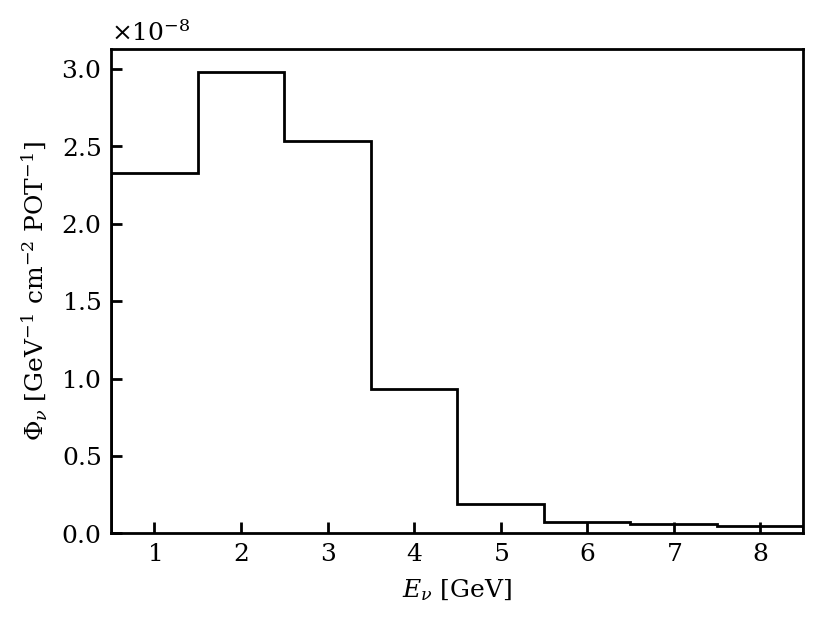

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.stairs(
    edges=E_vs_edges,
    values=ND_FLUX,
)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"$\Phi_\nu$ [GeV$^{-1}$ cm$^{-2}$ POT$^{-1}$]")
ax.set_xlim(E_vs_edges[0], E_vs_edges[-1])

fig.savefig("nd_flux.svg", transparent=True, dpi=800)

plt.show()

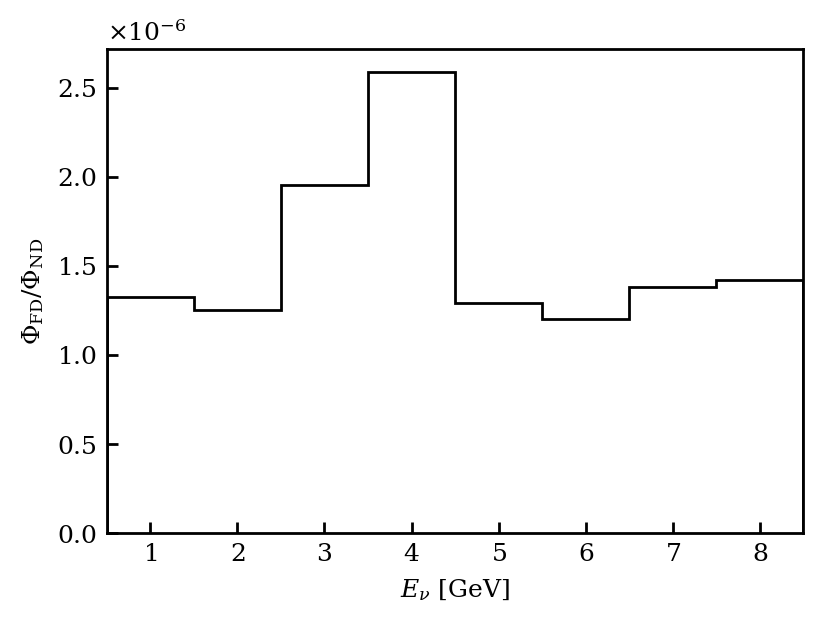

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.stairs(
    edges=E_vs_edges,
    values=ND_FD_RATIO,
)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"$\Phi_{\mathrm{FD}}/\Phi_{\mathrm{ND}}$")
ax.set_xlim(E_vs_edges[0], E_vs_edges[-1])

fig.savefig("fd_nd_ratio.svg", transparent=True, dpi=800)

plt.show()

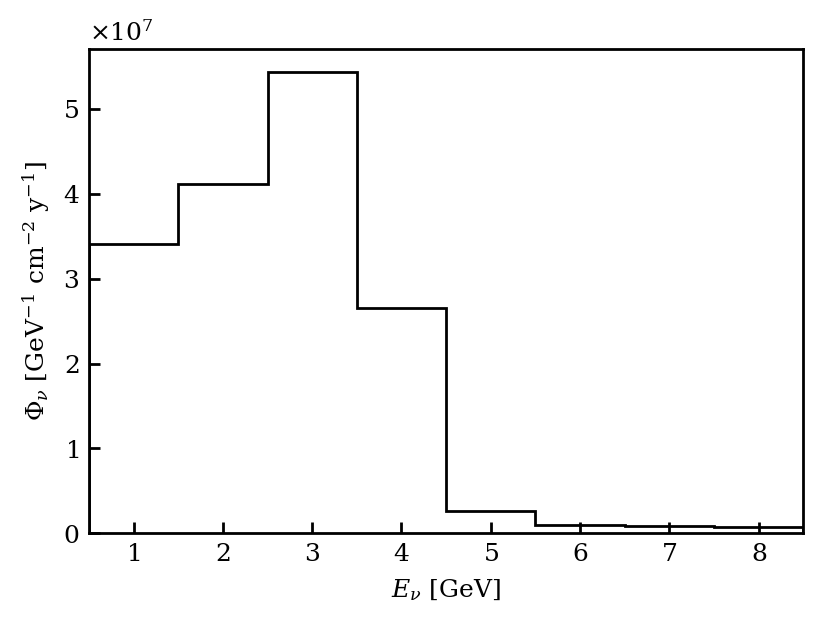

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.stairs(
    edges=E_vs_edges,
    values=ND_FLUX * ND_FD_RATIO * POT_PER_YEAR,
)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"$\Phi_\nu$ [GeV$^{-1}$ cm$^{-2}$ y$^{-1}$]")
ax.set_xlim(E_vs_edges[0], E_vs_edges[-1])

fig.savefig("fd_flux.svg", transparent=True, dpi=800)

plt.show()

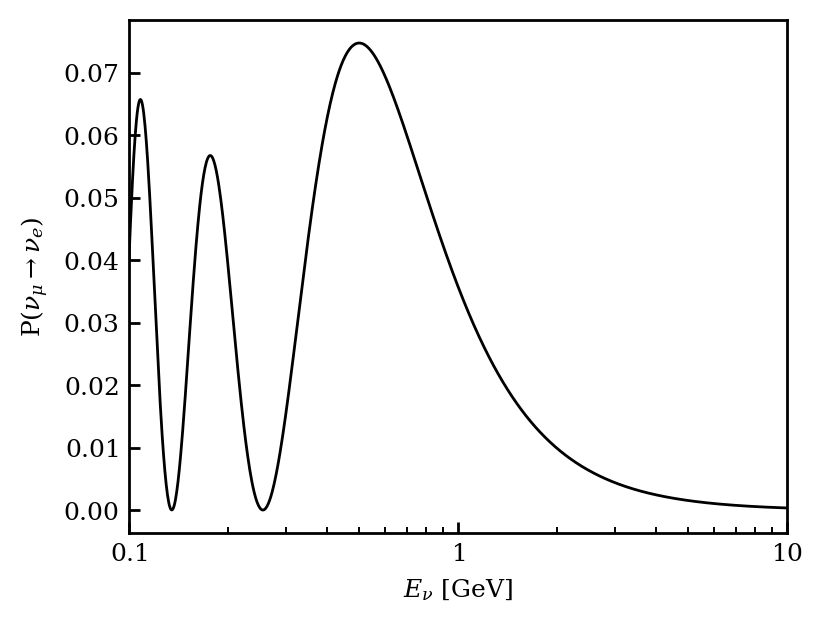

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

_E_vs = np.geomspace(1e-1, 1e1, 1001)

ax.plot(_E_vs, appearance(_E_vs))

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"P($\nu_\mu\rightarrow\nu_e$)")
ax.set_xlim(_E_vs[0], _E_vs[-1])
ax.set_xscale("log")

fig.savefig("appearance.svg", transparent=True, dpi=800)

plt.show()

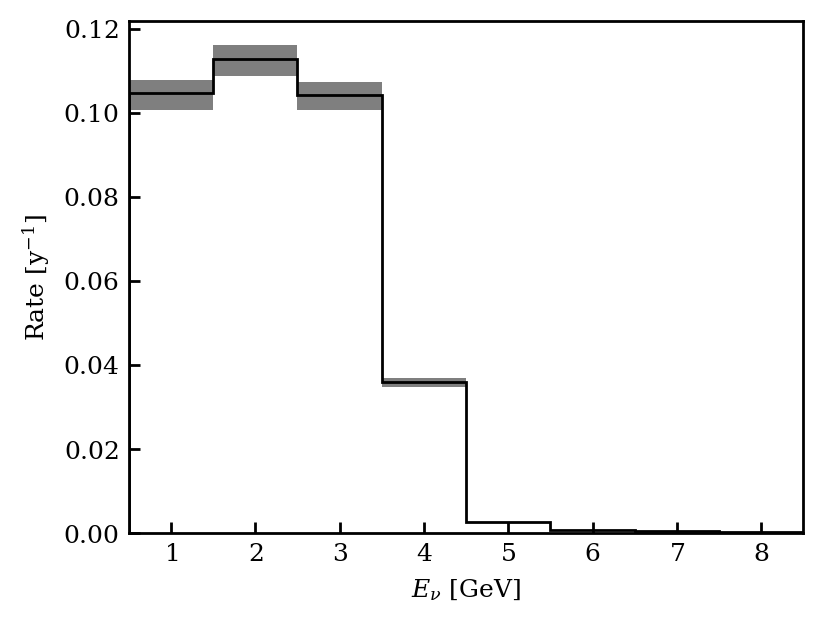

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

factor = 1e-38 * ND_FLUX * ND_FD_RATIO * POT_PER_YEAR * MASS * 1e6 / ARGON_MOL_MASS * AVOGADRO
factor *= appearance(E_vs)
ax.stairs(
    edges=E_vs_edges,
    values=sigmas[0, : len(E_vs)] * factor,
)
# sigma_mp = np.quantile(sigmas[1:, :len(E_vs)], norm.cdf([-1, 1]), axis=0)
sigma_mp = [
    np.min(sigmas[1:, : len(E_vs)], axis=0),
    np.max(sigmas[1:, : len(E_vs)], axis=0),
]
ax.bar(
    E_vs,
    height=(sigma_mp[1] - sigma_mp[0]) * factor,
    width=1.0,
    bottom=sigma_mp[0] * factor,
    alpha=0.5,
)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Rate [y$^{-1}$]")
ax.set_xlim(E_vs_edges[0], E_vs_edges[-1])
# ax.set_yscale("log")

fig.savefig("fd_rate.svg", transparent=True, dpi=800)

plt.show()